In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image, ImageOps, ImageDraw
from create_dataset import ClimbingHoldDataset
from collections import defaultdict
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from pycocotools import mask as maskUtils

In [28]:
hues = np.load('hues.npy').reshape(-1,1)

In [29]:
# Create the dataset
dataset = ClimbingHoldDataset(annotations_dir="data/annotations", 
                               images_dir="data/images")

dataset.add_color(hues)

In [30]:
dataset_pd = pd.DataFrame(dataset.holds)
dataset_pd.head()

,image_id,type,route_id,orientation,bbox,segmentation,color
0,IMG_8293.jpeg,Jug,201.0,UpAng,"[1307.0, 233.0, 425.0, 403.0]","{'counts': [5270210, 9, 4020, 19, 4011, 24, 40...",43.859815
1,IMG_8293.jpeg,Jib,201.0,UpAng,"[666.0, 2583.0, 170.0, 156.0]","{'counts': [2687974, 10, 4013, 26, 4003, 35, 3...",77.539466
2,IMG_8293.jpeg,Jib,201.0,UpAng,"[482.0, 3055.0, 176.0, 155.0]","{'counts': [1946558, 23, 4001, 35, 3994, 40, 3...",55.375041
3,IMG_8293.jpeg,Jib,201.0,UpAng,"[461.0, 3563.0, 176.0, 148.0]","{'counts': [1862383, 29, 4000, 36, 3993, 42, 3...",68.240997
4,IMG_8293.jpeg,Jib,201.0,Up,"[1761.0, 3261.0, 117.0, 78.0]","{'counts': [7103636, 15, 4014, 21, 4009, 25, 4...",42.978590


In [31]:
img_list = dataset_pd['image_id'].unique()

In [32]:
kmeans = KMeans(init="random", 
                n_clusters=3, 
                n_init=10, 
                max_iter=300, 
                random_state=42)

In [33]:
img_id = img_list[1]
img_dataset = dataset_pd[(dataset_pd['image_id'] == img_id)]

In [54]:
route_list = img_dataset['route_id'].unique()
print(route_list)

[203. 204. 202.]


In [41]:
features = img_dataset['color'].to_numpy().reshape(-1,1)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
kmeans.fit(scaled_features)
preds = kmeans.labels_

In [ ]:
def display_masked_image(img_path, rles):
    img = Image.open(img_path).convert("RGB")
    img = ImageOps.exif_transpose(img)

    h, w = img.shape[:2]

    combined_mask = np.zeros((h, w), dtype=np.uint8)

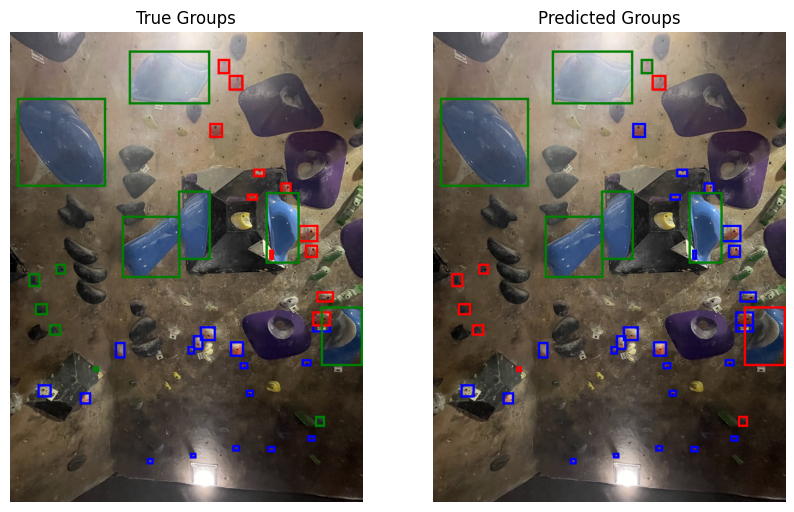

In [72]:
images_dir = 'data/images'
img_path = os.path.join(images_dir, img_id)

img = Image.open(img_path).convert("RGB")
img = ImageOps.exif_transpose(img)

image_with_boxes_pred = img.copy()
draw_pred = ImageDraw.Draw(image_with_boxes_pred)

colors = {0:'red', 1:'blue', 2:'green', 3:'yellow', 4:'purple'}

for i, bbox in enumerate(img_dataset['bbox']):
    x, y, width, height = bbox
    label = preds[i]
    color = colors[label]
    draw_pred.rectangle([x, y, x + width, y + height], outline=color, width=20)

image_with_boxes_true = img.copy()
draw_true = ImageDraw.Draw(image_with_boxes_true)

colors = {202:'green', 203:'blue', 204:'red', 3:'yellow', 4:'purple'}

for route, bbox in zip(img_dataset['route_id'], img_dataset['bbox']):
    x, y, width, height = bbox
    label = route
    color = colors[label]
    draw_true.rectangle([x, y, x + width, y + height], outline=color, width=20)

# Display the image with bounding boxes
f, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(image_with_boxes_true)
ax[0].set_title("True Groups")
ax[0].axis("off")
ax[1].imshow(image_with_boxes_pred)
ax[1].set_title("Predicted Groups")
ax[1].axis("off")
plt.show()



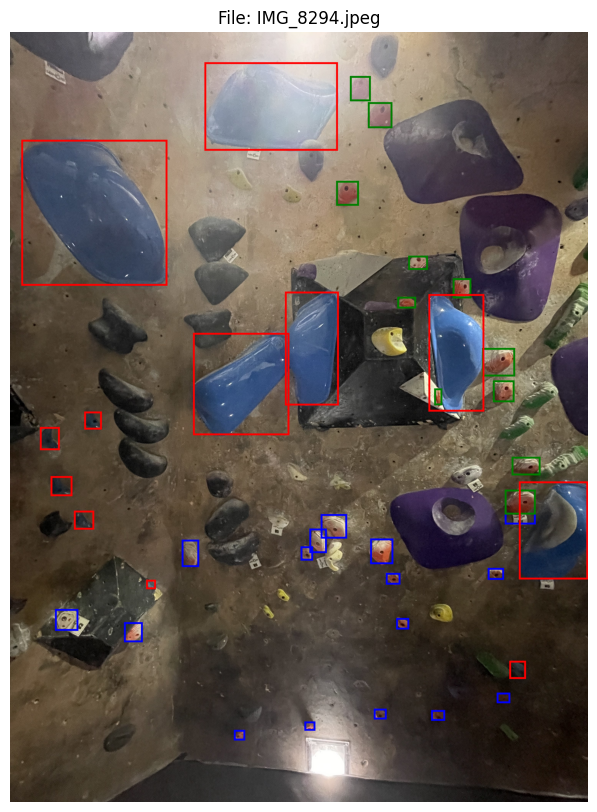

In [35]:
def visualize_hues(hues):
    for H in hues[:100]:
        # Make a strip of HSV values where hue = your hue
        hsv_strip = np.zeros((50, 200, 3), dtype=np.uint8)
        hsv_strip[..., 0] = H      # Hue
        hsv_strip[..., 1] = 255    # Full saturation
        hsv_strip[..., 2] = 255    # Full brightness

        # Convert to RGB for proper display
        rgb_strip = cv2.cvtColor(hsv_strip, cv2.COLOR_HSV2RGB)

        plt.figure(figsize=(2,2))
        plt.imshow(rgb_strip)
        plt.title(f"Hue = {H}")
        plt.axis('off')
        plt.show()

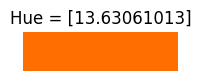

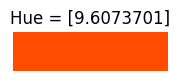

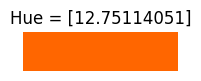

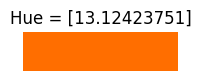

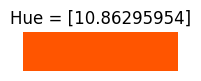

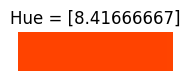

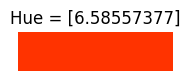

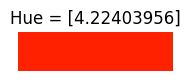

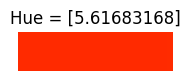

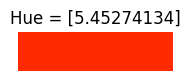

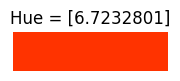

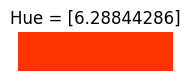

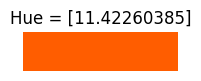

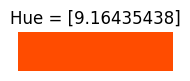

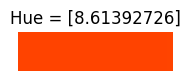

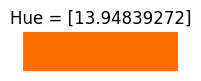

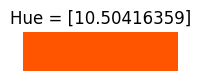

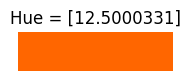

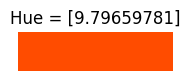

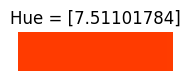

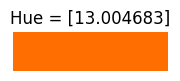

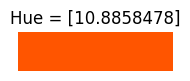

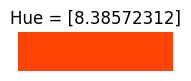

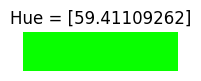

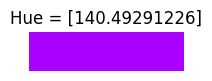

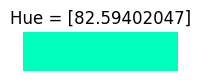

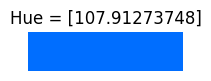

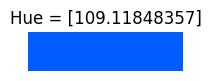

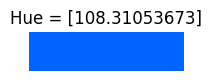

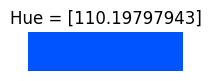

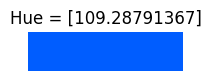

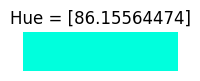

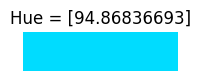

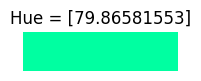

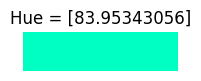

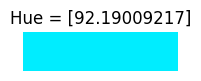

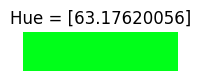

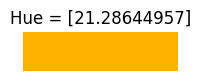

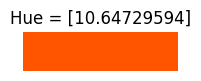

In [36]:
visualize_hues(features)

In [25]:
def print_sample_hold(sample):
    # sample = dataset[500] # change to whatever number you want
    
    # # Denormalize the image
    # mean = torch.tensor([0.485, 0.456, 0.406]).reshape(3,1,1)
    # std = torch.tensor([0.229, 0.224, 0.225]).reshape(3,1,1)
    # img = sample["image"] * std + mean
    # img = img.clamp(0, 1)

    # pil_img = transforms.ToPILImage()(img)

    # display(pil_img)
    print("\nSample Hold:")
    # print(f"Parent image id: {sample['parent_image_id']}")
    print(f"Route ID: {sample['route_id']}")
    # print(f"Image shape: {sample['image'].shape}")
    print(f"Hold Type (index): {sample['type']}")
    print(f"Hold Orientation (index): {sample['orientation']}")
    print(f'Color: {sample['color']}')

# # Print one sample hold from both training and validation sets
# print("\nSample Hold from Training Set:")
print_sample_hold(holds_by_image['IMG_7280.JPG'][2])


Sample Hold:
Route ID: 2.0
Hold Type (index): Jug
Hold Orientation (index): UpAng
Color: [110.85855326]
